[View in Colaboratory](https://colab.research.google.com/github/endyleon/pruebaSplit/blob/recording/RecordingRadioStreamMusicColab.ipynb)

In [0]:
!apt install ffmpeg
!pip install librosa
!pip install ipython
!pip install pydub
#!pip install seaborn
#!pip install mir_eval


In [0]:
import requests
import time
import IPython.display as ipd
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
from pydub import AudioSegment

import librosa.display 
import seaborn 


import os
#from progressbar import ProgressBar

from google.colab import files

#!git clone https://github.com/endyleon/pruebaSplit.git

In [0]:
stream_url = 'http://streaming.hotmixradio.fr/hotmixradio-hits-128.mp3'
#seaborn.set(style = 'ticks')

In [0]:
##Acá debes dejarlo grabando durante un rato

r = requests.get(stream_url, stream = True)
time_text = time.strftime('%y%m%d_%H%M%S')
time_text
audio_name = 'stream'+time_text
with open (audio_name+'.mp3', 'wb') as f:
  try:
    for block in r.iter_content(1024):
      f.write(block)
  except KeyboardInterrupt:
    pass

In [0]:
#files.download(audio_name+'.mp3')
ls

In [0]:
#Por ahora se usa el nombre listado en la celda de arriba
y, sr = librosa.load(audio_name+'.mp3')

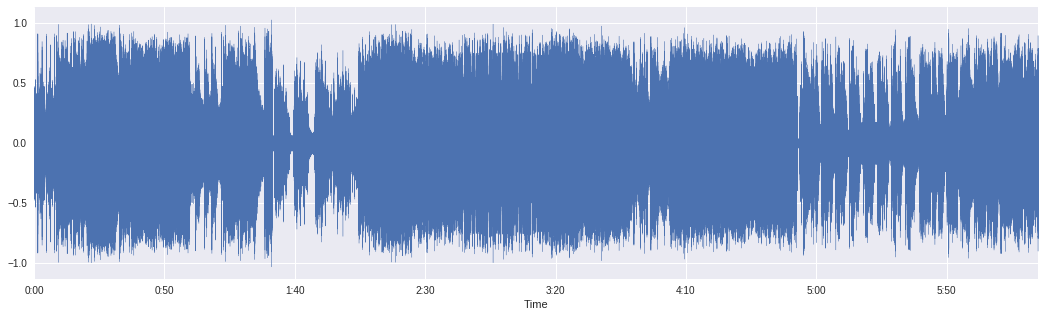

In [141]:
plt.figure(figsize = (18, 5))
librosa.display.waveplot(y, sr=sr)

In [11]:
a=librosa.effects.split(y, top_db=36, frame_length=2048, hop_length=512)
a

array([[    512, 6453760],
       [6460416, 8494272]])

In [0]:
a.dtype.name
a.size
a[1]
a.ndim

In [169]:
c=0
for i in a:
  start=((a[c,0]))
  end=(a[c,1])  
  #### Create the Audio Segment
  if c == 1:
    audioSegm=audio_name+"_"+str(c+1)+".mp3"
    newAudio = AudioSegment.from_mp3(audio_name+".mp3")
    timeAudio = newAudio.duration_seconds*1000
    split_ini = timeAudio*start/y.shape[0]
    split_end = timeAudio*end/y.shape[0]
    
    newAudio1 = newAudio[split_ini:split_end]
    audioFragment=newAudio1.export(audioSegm, format="mp3")
  
  print(f"AudioSegment {c+1} must init on {start} and finish on {end}")
  c+=1

AudioSegment 1 must init on 512 and finish on 6453760
AudioSegment 2 must init on 6460416 and finish on 8494272


In [171]:
audioSegm

'stream180923_135549_2.mp3'

In [173]:
ipd.Audio(audioSegm)

In [0]:
Audio(data=y, rate=sr)

In [0]:
Y = librosa.stft(y, sr)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(18, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis = 'time', y_axis='hz')
#plt.colorbar();

In [0]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

In [0]:
Audio(y_harmonic, rate=sr)

In [0]:
Audio(y_percussive, rate=sr)

In [0]:
librosa.effects.split(y, top_db=60, frame_length=2048, hop_length=512)
#librosa.core.get_duration(y=None, sr=sr, S=librosa.stft(y), n_fft=2048, hop_length=512, center=True, filename=None)